In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv
/kaggle/input/novel-corona-virus-2019-dataset/2019_nCoV_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv


## Content
2019 Novel Coronavirus (2019-nCoV) is a virus (more specifically, a coronavirus) identified as the cause of an 

outbreak of respiratory illness first detected in Wuhan, China. Early on, many of the patients in the outbreak in 

Wuhan, China reportedly had some link to a large seafood and animal market, suggesting animal-to-person spread. 

However, a growing number of patients reportedly have not had exposure to animal markets, indicating person-to-

person spread is occurring. At this time, it’s unclear how easily or sustainably this virus is spreading between 

people - CDC

This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus. Please note that this is a time series data and so the number of cases on any given day is the cumulative number.

- The data is available from 22 Jan, 2020.



## Column Description

Main file in this dataset is covid_19_data.csv and the detailed descriptions are below.

covid_19_data.csv

- Sno - Serial number

- ObservationDate - Date of the observation in MM/DD/YYYY

- Province/State - Province or state of the observation (Could be empty when missing)

- Country/Region - Country of observation

- Last Update - Time in UTC at which the row is updated for the given province or country. (Not standardised and so please clean before using it)

- Confirmed - Cumulative number of confirmed cases till that date

- Deaths - Cumulative number of of deaths till that date

- Recovered - Cumulative number of recovered cases till that date

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv('../input/novel-corona-virus-2019-dataset/covid_19_data.csv')
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4513 entries, 0 to 4512
Data columns (total 8 columns):
SNo                4513 non-null int64
ObservationDate    4513 non-null object
Province/State     2912 non-null object
Country/Region     4513 non-null object
Last Update        4513 non-null object
Confirmed          4513 non-null float64
Deaths             4513 non-null float64
Recovered          4513 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 282.2+ KB


In [5]:
data.isnull().sum()

SNo                   0
ObservationDate       0
Province/State     1601
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [6]:
data.shape

(4513, 8)

In [7]:
data.nunique()

SNo                4513
ObservationDate      48
Province/State      195
Country/Region      115
Last Update        1236
Confirmed           619
Deaths               88
Recovered           491
dtype: int64

- Clearly there is no need to make it a time series.

- Notice that the Last Update has 1236 values. 

In [29]:
data['Victims'] = data['Confirmed'] - data['Recovered'] - data['Deaths']
data['Victims'].head()

0     1.0
1    14.0
2     6.0
3     1.0
4     0.0
Name: Victims, dtype: float64

In [30]:
data['ObservationDate'] = pd.to_datetime(data['ObservationDate'])
data['ObservationDate'].head()

0   2020-01-22
1   2020-01-22
2   2020-01-22
3   2020-01-22
4   2020-01-22
Name: ObservationDate, dtype: datetime64[ns]

In [33]:
# corona["Days"] = corona["ObservationDate"] - pd.to_datetime(['2020-01-22']*len(corona))

data['Days'] = data['ObservationDate'] - pd.to_datetime(['2020-01-22']*len(data))
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Victims,Days
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1.0,0 days
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,14.0,0 days
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,6.0,0 days
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1.0,0 days
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,0.0,0 days


In [39]:
# corona["Days"] = corona["Days"].astype('timedelta64[D]')
data["Days"] = data["Days"].astype('timedelta64[D]')
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Victims,Days
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,14.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,6.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,0.0,0.0


The Concept here is to find the daily difference in the Data.
- So Days is only providing the daily information.

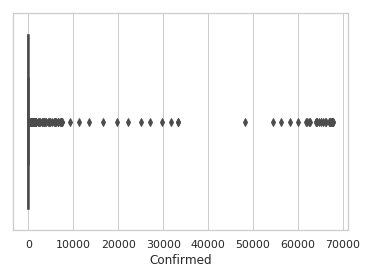

In [34]:
sns.set(style='whitegrid')
sns.boxplot(data['Confirmed'],color='g')

In [48]:
chin = data[data['Country/Region']=='Mainland China']
chin.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Victims,Days
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,14.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,6.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Deaths In Mainland China')

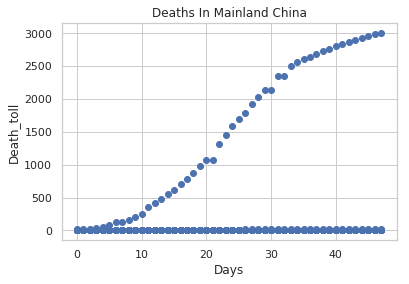

In [50]:
plt.scatter(chin['Days'],chin['Deaths'])
plt.xlabel("Days")
plt.ylabel("Death_toll")
plt.title("Deaths In Mainland China")

In [51]:
x = data[data['Country/Region']=="Mainland China"]
x.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Victims,Days
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,14.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,6.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,0.0,0.0


In [52]:
x.nunique()

SNo                1482
ObservationDate      48
Province/State       31
Country/Region        1
Last Update         668
Confirmed           531
Deaths               62
Recovered           478
Victims             488
Days                 48
dtype: int64

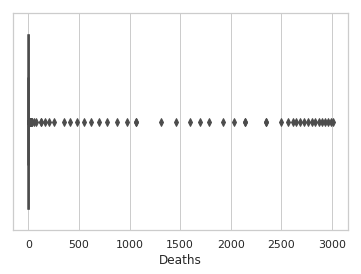

In [53]:
sns.set(style='whitegrid')
sns.boxplot(x['Deaths'],color='b')

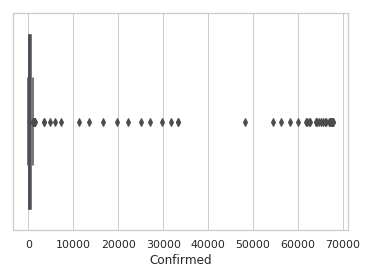

In [54]:
sns.set(style='whitegrid')
sns.boxplot(x['Confirmed'],color='b')

In [55]:
x.describe()

,SNo,Confirmed,Deaths,Recovered,Victims,Days
count,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000
mean,1631.594467,1614.566127,50.147773,566.486505,997.931849,23.576923
std,1163.620288,8586.176940,328.645066,3526.649631,5549.786239,13.832697
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,632.250000,69.000000,0.000000,3.000000,21.000000,12.000000
50%,1493.500000,163.000000,1.000000,52.000000,71.500000,24.000000
75%,2482.500000,486.750000,3.000000,211.000000,221.000000,36.000000
max,4442.000000,67743.000000,3008.000000,46488.000000,50633.000000,47.000000


In [56]:
x.isnull().sum()

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
Victims            0
Days               0
dtype: int64

Text(0.5, 1.0, 'Total Death Count ')

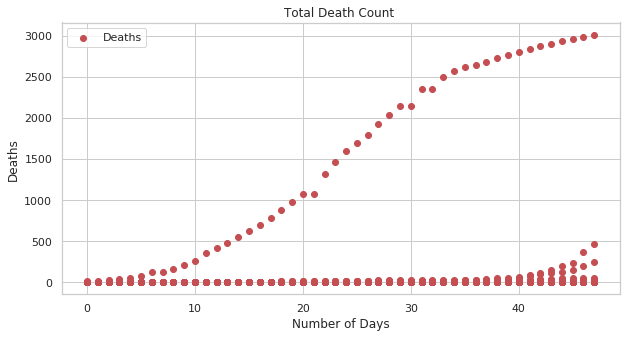

In [60]:
plt.figure(figsize=(10,5))
plt.grid(True)
plt.scatter(data['Days'],data['Deaths'],marker='o',color='r')
plt.legend(loc=2)
plt.xlabel('Number of Days')
plt.ylabel('Deaths')
plt.title('Total Death Count ')

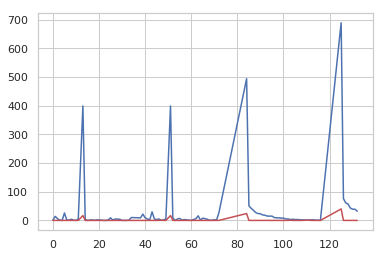

In [61]:
plt.plot(x.Victims[:100],'b',label='Active Victims')
plt.plot(x.Deaths[:100],'r',label='Deaths')

Text(0.5, 1.0, 'Death v/s Confirmed Cases')

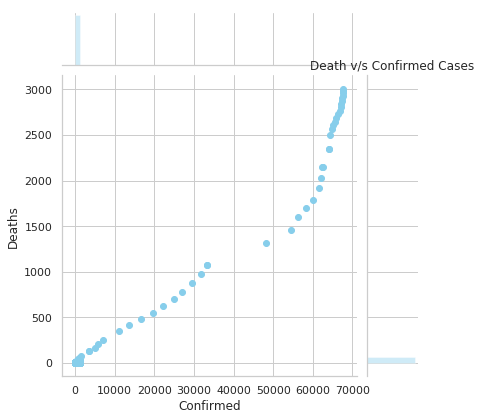

In [17]:
sns.jointplot(x['Confirmed'],x['Deaths'], kind='scatter',height=6 ,color='skyblue' )
plt.title('Death v/s Confirmed Cases')

Text(0.5, 1.0, 'CORRELATION')

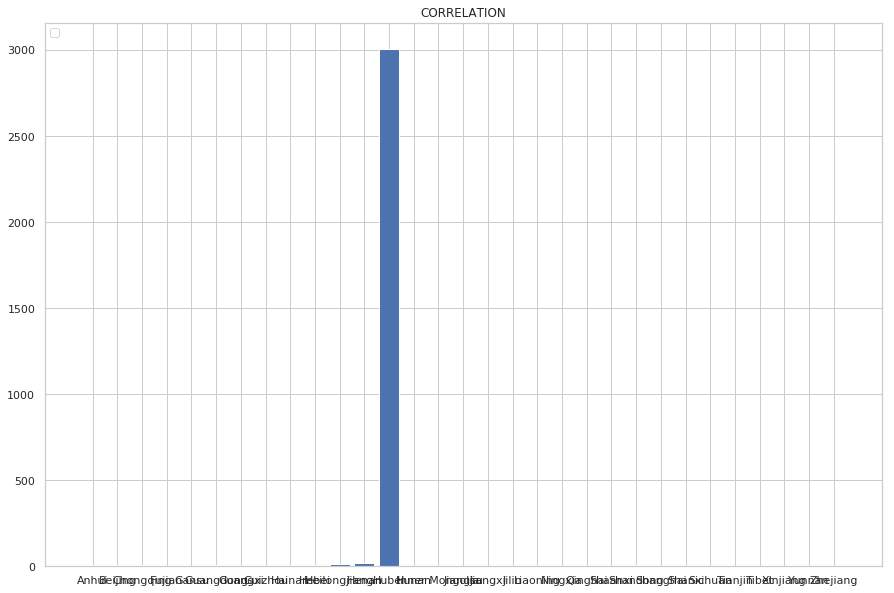

In [18]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.bar(x['Province/State'],x['Deaths'])
plt.legend(loc=2)
plt.title('CORRELATION')

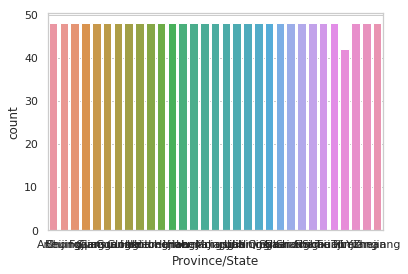

In [19]:
sns.countplot(x = 'Province/State' , data = x)

In [20]:
# data.groupby('Customer_status')['ActiveSinceDays'].mean()      #customer status and ASDays mean
y = x.groupby('Province/State')['Deaths']
y.nunique()

Province/State
Anhui              6
Beijing            8
Chongqing          7
Fujian             2
Gansu              3
Guangdong          8
Guangxi            3
Guizhou            3
Hainan             7
Hebei              7
Heilongjiang      12
Henan             16
Hubei             43
Hunan              5
Inner Mongolia     2
Jiangsu            1
Jiangxi            2
Jilin              2
Liaoning           2
Ningxia            1
Qinghai            1
Shaanxi            2
Shandong           7
Shanghai           4
Shanxi             1
Sichuan            3
Tianjin            4
Tibet              1
Xinjiang           4
Yunnan             3
Zhejiang           2
Name: Deaths, dtype: int64

In [22]:
h = x[x['Province/State']=='Hubei']
# h.drop(['Case','States'],axis=1,inplace= True)
h

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
13,14,01/22/2020,Hubei,Mainland China,1/22/2020 17:00,444.0,17.0,28.0
51,52,01/23/2020,Hubei,Mainland China,1/23/20 17:00,444.0,17.0,28.0
84,85,01/24/2020,Hubei,Mainland China,1/24/20 17:00,549.0,24.0,31.0
125,126,01/25/2020,Hubei,Mainland China,1/25/20 17:00,761.0,40.0,32.0
169,170,01/26/2020,Hubei,Mainland China,1/26/20 16:00,1058.0,52.0,42.0
216,217,01/27/2020,Hubei,Mainland China,1/27/20 23:59,1423.0,76.0,45.0
267,268,01/28/2020,Hubei,Mainland China,1/28/20 23:00,3554.0,125.0,80.0
319,320,01/29/2020,Hubei,Mainland China,1/29/20 19:30,3554.0,125.0,88.0
373,374,01/30/2020,Hubei,Mainland China,1/30/20 16:00,4903.0,162.0,90.0
431,432,01/31/2020,Hubei,Mainland China,1/31/2020 23:59,5806.0,204.0,141.0


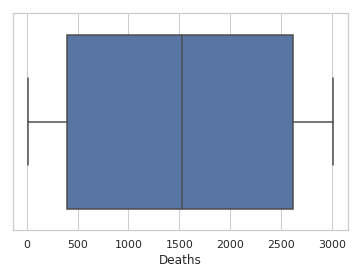

In [23]:
sns.boxplot(h['Deaths'])

- SO, Clearly the most amount of deaths are in MainLand China and with most Occuring in the State "Hubei" 

In [24]:
m = x[x['Province/State']=='Henan']
# m.drop(['Case','States'],axis=1,inplace= True)
m

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
11,12,01/22/2020,Henan,Mainland China,1/22/2020 17:00,5.0,0.0,0.0
49,50,01/23/2020,Henan,Mainland China,1/23/20 17:00,5.0,0.0,0.0
97,98,01/24/2020,Henan,Mainland China,1/24/20 17:00,9.0,0.0,0.0
133,134,01/25/2020,Henan,Mainland China,1/25/20 17:00,32.0,0.0,0.0
172,173,01/26/2020,Henan,Mainland China,1/26/20 16:00,83.0,1.0,0.0
219,220,01/27/2020,Henan,Mainland China,1/27/20 23:59,128.0,1.0,0.0
270,271,01/28/2020,Henan,Mainland China,1/28/20 23:00,168.0,1.0,0.0
323,324,01/29/2020,Henan,Mainland China,1/29/20 19:30,206.0,2.0,1.0
376,377,01/30/2020,Henan,Mainland China,1/30/20 16:00,278.0,2.0,2.0
434,435,01/31/2020,Henan,Mainland China,1/31/2020 23:59,352.0,2.0,3.0


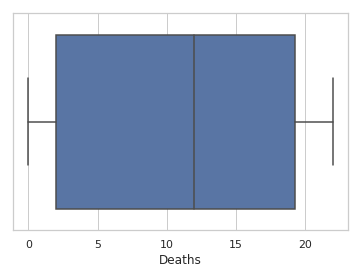

In [25]:
sns.boxplot(m['Deaths'])